In [5]:
import numpy as np

def make_polynomial_dataset(degree=2, n_samples=100, noise=1, low=0, high=20):
    n_features = 1
    p = degree
    np.random.seed(45)
    x = np.random.uniform(low = low, high = high, size = (n_samples, n_features))
    x = x[np.argsort(x[:, 0])]
    y = np.zeros((n_samples, 1))
    
    y = x ** p + np.random.normal(0, noise, size=(n_samples, 1))
    
    return x, y
    

In [6]:
import matplotlib.pyplot as plt

def plot_regression_line(X, y, predictions):
    sorted_idx = np.argsort(X[:, 0], axis=-1)

    plt.plot(X[:, 0], y, 'x', color='blue')
    plt.plot(X[sorted_idx, 0], predictions[sorted_idx, 0], '-', color='red')

In [7]:
# Generate dataset

X, y = make_polynomial_dataset(degree=2, n_samples=400, noise=60, low=-20, high=20)

print(X.shape)
print(y.shape)

(400, 1)
(400, 1)


In [8]:
# Print the first ten observations

print(X[:10,:])

[[-19.57296866]
 [-19.15760369]
 [-19.14824964]
 [-19.13388798]
 [-19.08763487]
 [-18.87608718]
 [-18.78106634]
 [-18.74256327]
 [-18.67649339]
 [-18.48288121]]


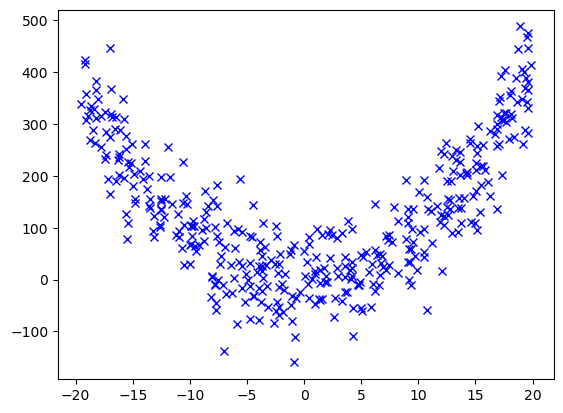

In [9]:
plt.plot(X, y, 'x', color='blue')

## Split The Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 1)
(80, 1)
(320, 1)
(80, 1)


## Linear Regression (OLS)

Train a OLS model and print the resulting line

In [13]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression().fit(X_train, y_train)

In [14]:
print(ols_model.intercept_)
print(ols_model.coef_)

[129.66100253]
[[1.18494631]]


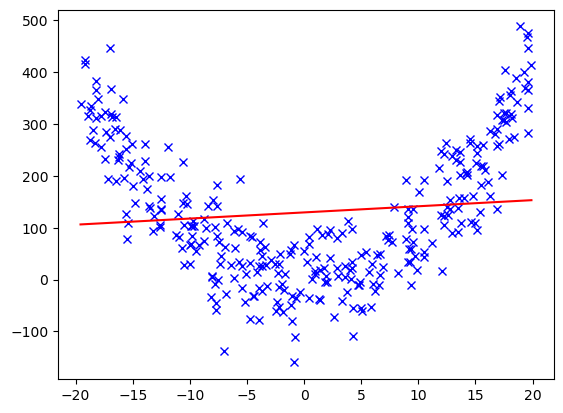

In [15]:
plot_regression_line(X_train, y_train, ols_model.predict(X_train))

In [16]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, ols_model.predict(X_train)))

17121.72179810429


## Polynomial Regression

Train a quadratic model and print the resulting line

In [18]:
X_train_square = X_train ** 2

In [19]:
ols_model_square = LinearRegression().fit(X_train_square, y_train)

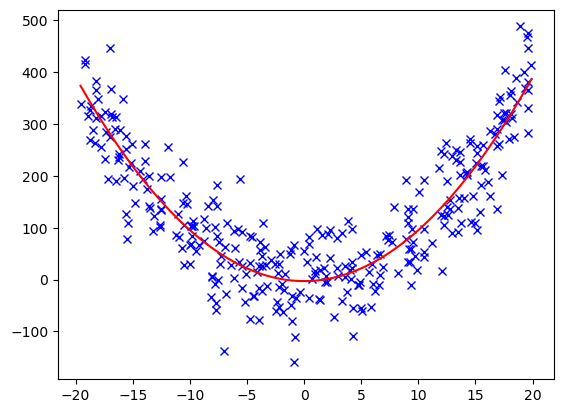

In [20]:
plot_regression_line(X_train, y_train, ols_model_square.predict(X_train_square))

In [21]:
print(mean_squared_error(y_train, ols_model_square.predict(X_train_square)))

3433.0394878550405


## Polynomial Regression with degree=k

Use PolynomialFeatures to create a polynomial model with a high degree

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

poly_degree = 80

regression_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [24]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=80, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [25]:
print(regression_pipeline.named_steps["regressor"].intercept_)
print(regression_pipeline.named_steps["regressor"].coef_)

[130.26050398]
[[ 4.98345208e+02 -3.35195562e+03 -4.34308457e+04  4.62993586e+05
   1.74768800e+06 -2.36828138e+07 -3.66830063e+07  6.48738986e+08
   3.96873022e+08 -1.10411979e+10 -1.41768647e+09  1.26301968e+11
  -1.79142906e+10 -1.01612352e+12  3.02093083e+11  5.89853275e+12
  -2.27895624e+12 -2.49679946e+13  1.08588754e+13  7.66871003e+13
  -3.50412731e+13 -1.66265822e+14  7.62642017e+13  2.35707498e+14
  -1.03142906e+14 -1.67628638e+14  5.92446410e+13 -4.80011377e+13
   4.56029837e+13  1.72045710e+14 -8.05721663e+13 -1.47002569e+13
  -2.07681132e+13 -1.48079689e+14  7.87848662e+13  1.48198571e+12
   2.84343721e+13  1.32861127e+14 -6.91750432e+13  4.41973904e+13
  -5.39264975e+13 -9.99281992e+13  4.14309439e+13 -9.23053981e+13
   7.69159562e+13  3.19333156e+13  9.91015184e+12  1.05865695e+14
  -7.18555329e+13  4.86064207e+13 -6.22162163e+13 -5.95916449e+13
   2.07830909e+13 -9.01978949e+13  8.07088002e+13 -2.33996604e+13
   5.02777778e+13  6.49316490e+13 -4.40395326e+13  7.48798104

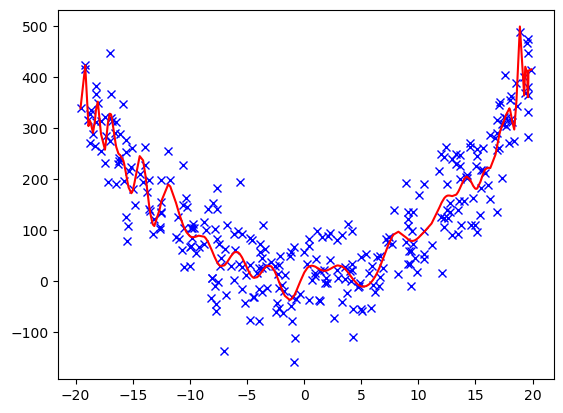

In [26]:
plot_regression_line(X_train, y_train, regression_pipeline.predict(X_train))

In [27]:
print(mean_squared_error(y_test, regression_pipeline.predict(X_test)))

4010.1239002197226


In [28]:
print(mean_squared_error(y_train, regression_pipeline.predict(X_train)))

2835.3190892380103


In [29]:
print(mean_squared_error(y_test, ols_model_square.predict(X_test ** 2)))

3213.4626505993283


In [30]:
print(mean_squared_error(y_train, ols_model_square.predict(X_train_square)))

3433.0394878550405


[[ 3.32968025e+01]
 [ 8.98114461e+00]
 [ 2.65697556e+01]
 [ 5.59125841e+00]
 [ 1.97348492e+01]
 [ 5.71558490e+00]
 [ 3.92442292e+02]
 [ 1.06585614e+02]
 [ 4.51632958e+01]
 [ 8.24234214e+01]
 [ 2.26292390e+02]
 [ 2.69268248e+01]
 [ 1.76589395e+02]
 [ 1.52428505e+02]
 [ 1.07151811e+02]
 [ 2.22451507e+02]
 [ 1.21221215e+02]
 [ 9.16160251e+01]
 [ 5.43168010e+01]
 [ 2.14166469e+02]
 [ 1.75161742e+02]
 [ 3.49932426e+02]
 [ 3.33515255e+02]
 [ 1.94381467e+02]
 [ 5.11435716e+00]
 [ 5.53273193e-01]
 [ 2.65548469e+02]
 [ 1.38840915e+02]
 [ 2.90950306e+02]
 [ 9.44943940e+01]
 [ 1.39621234e+02]
 [ 1.68775641e+02]
 [ 5.10326744e+01]
 [ 5.29031015e+00]
 [ 3.75761448e+01]
 [ 4.13099458e+02]
 [ 2.71955185e+00]
 [ 3.89983432e+02]
 [ 5.83878422e+01]
 [ 1.10398009e+02]
 [ 6.16677058e+01]
 [ 7.23853562e+01]
 [ 1.08009923e+02]
 [ 7.55039683e-01]
 [ 3.14664633e+02]
 [ 6.27966926e+00]
 [ 2.71129841e+02]
 [ 5.15956752e+01]
 [ 4.36322870e+00]
 [ 2.16771036e+02]
 [ 1.43092980e+01]
 [ 4.08322919e+01]
 [ 3.8341815

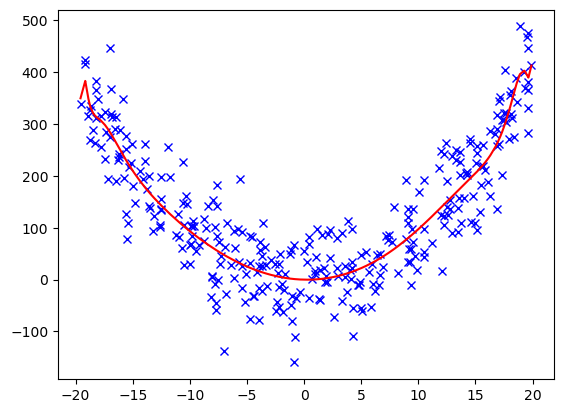

In [31]:
from sklearn.linear_model import Ridge

regression_pipeline_2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=.20))
])

regression_pipeline_2.fit(X_train, y_train)

print (regression_pipeline_2.predict(X_train))

plot_regression_line(X_train, y_train, regression_pipeline_2.predict(X_train))




[ 32.18500215  11.30250147  28.36160734   5.69888707  18.95632517
   5.81031102 400.30965063 101.72330012  43.98683146  79.48192148
 236.68885211  25.93122198 174.23120651 147.06641385 102.25286313
 222.11737008 115.59605824  91.69972998  53.20776243 214.9558491
 172.53972946 362.97385372 324.77231481 196.21003051   7.33589509
   2.28539818 258.51746697 132.96797284 283.12048968  90.51907957
 133.75899736 165.11181584  50.98282712   5.42989599  36.41981569
 395.91018076   4.77929036 401.36274882  57.67403833 111.53336304
  60.68086966  71.6800113  103.05641466   1.61896076 323.9055902
   6.31789476 281.21475683  50.45656012   4.60849946 224.98376072
  13.77436688  41.64008532 358.93092175   9.22839139 200.00280286
  77.152547    41.89074052  57.9486924    8.58720818   6.59789149
 196.37640654 268.51736345 104.44189139   2.92700729 188.47092663
  71.80328777   1.94806316   4.26153333  76.79897194 139.45480249
  22.18071226  18.0818142  134.49813569 332.60110228  15.2362981
 342.27338228

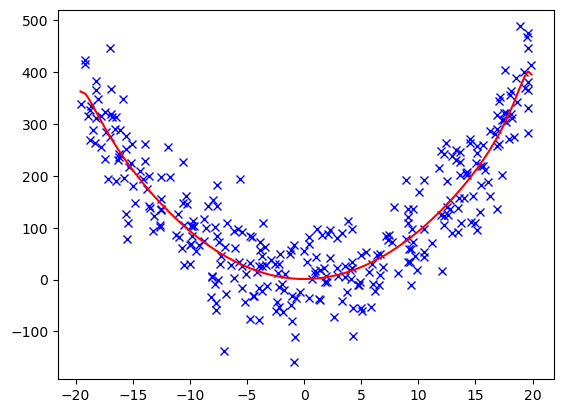

In [32]:
from sklearn.linear_model import Lasso


def plot_regression_line(X, y, predictions):
    sorted_idx = np.argsort(X[:, 0], axis=-1)

    plt.plot(X[:, 0], y, 'x', color='blue')
    plt.plot(X[sorted_idx, 0], predictions[sorted_idx], '-', color='red')
    
regression_pipeline_3 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=.20))
])

regression_pipeline_3.fit(X_train, y_train)
z = regression_pipeline_3.predict(X_train)
print (z)
plot_regression_line(X_train, y_train, z)


In [33]:
from sklearn.model_selection import cross_val_score

CSV 3537.3772942241085
TEST SET ERR 3309.8180607135573


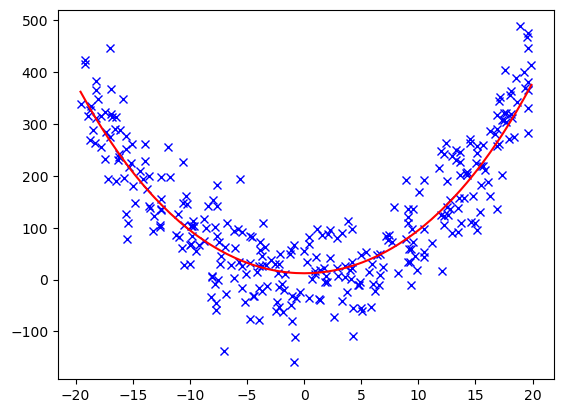

In [78]:
from sklearn.linear_model import Lasso


def plot_regression_line(X, y, predictions):
    sorted_idx = np.argsort(X[:, 0], axis=-1)

    plt.plot(X[:, 0], y, 'x', color='blue')
    plt.plot(X[sorted_idx, 0], predictions[sorted_idx], '-', color='red')
    
regression_pipeline_3 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=10))
])

#regression_pipeline_3 = Pipeline([
#    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
#    ('scaler', StandardScaler())
#])

regression_pipeline_3.fit(X_train, y_train)
z = regression_pipeline_3.predict(X_train)
#print (z)
plot_regression_line(X_train, y_train, z)

scores = cross_val_score(regression_pipeline_3, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

print ("CSV", np.mean(-scores))

print ("TEST SET ERR", mean_squared_error (y_test, regression_pipeline_3.predict(X_test)))